## welcome

* Are paid apps getting more popular the free apps? 
* Which category has the highest share? 
* What is the distribution of rating?
* What is the correlation between the rating of the app and the cost or her popularity.


In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [489]:
app_df = pd.read_csv("googleplaystore.csv",encoding= "utf-8")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [490]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [491]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [492]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [493]:
reviews_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [494]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### <span style="color:red">Data cleaning</span> 
* there are no all-blank rows
* there are many reviews with App names but without any other information 
* change the datatype of "Price" and "Installs" to float
* remove duplicate

In [495]:
print("reviews DataFrame shape before:", reviews_df.shape)
columns = ["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"]
null_rows = reviews_df[reviews_df[columns].isna().any(axis=1)]
reviews_df.drop(index=null_rows.index, inplace=True)
app_df.drop(index= app_df[app_df.Rating.isnull()].index, inplace=True)
print("reviews DataFrame shape after:", reviews_df.shape)

reviews DataFrame shape before: (64295, 5)
reviews DataFrame shape after: (37427, 5)


In [496]:
#there is one row with bed data that i need to remove
bed_row = app_df.loc[app_df["App"]=="Life Made WI-Fi Touchscreen Photo Frame"].index
app_df.drop(index=bed_row, inplace=True)

In [497]:
app_df["Price"] = app_df["Price"].str.replace('$','', regex=True)
app_df["Installs"]= app_df["Installs"].str.replace(r'[\+\,]','', regex=True)

In [498]:
app_df["Price"]= app_df["Price"].astype("float")
app_df["Installs"] = pd.to_numeric(app_df["Installs"])
app_df["Installs"]= app_df["Installs"].astype("int32")
app_df["Reviews"]= app_df["Reviews"].astype("int32")

##### Convert "Size" to Mb

In [499]:
app_df["Size"] = app_df["Size"].str.replace('Varies with device', 'NaN')
app_df["Size"] = app_df["Size"].str.replace('M', '')
app_df["Size"] = app_df["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(x))

##### Convert to lowercase letters

In [500]:
app_df["App"] = app_df["App"].str.lower()
app_df["Category"] = app_df["Category"].str.lower()
app_df["Genres"] = app_df["Genres"].str.lower()

##### Remove duplicate

In [501]:
print("There are {} duplicates rows in App DataFrame".format(app_df.duplicated(subset=["App"]).sum()))
# print("there are {} duplicates rows", reviews_df.duplicated().sum())

There are 1186 duplicates rows in App DataFrame


In [502]:
app_df.drop_duplicates(subset=["App"],inplace=True)

##### Removing outliers
* I assume that apps that cost more than 70$ are probably a scam. 
* There aren't apps with ratings of more than 5.0

In [503]:
app_df.loc[app_df["Price"]>70.0].head(10)
#"💎 i'm rich app i porbebly a scam"

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,vargo anesthesia mega app,medical,4.6,92,32.0,1000,Paid,79.99,Everyone,medical,"June 18, 2018",19.0,4.0.3 and up
4197,most expensive app (h),family,4.3,6,1.5,100,Paid,399.99,Everyone,entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 i'm rich,lifestyle,3.8,718,26.0,10000,Paid,399.99,Everyone,lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,i'm rich - trump edition,lifestyle,3.6,275,7.3,10000,Paid,400.00,Everyone,lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,i am rich,lifestyle,3.8,3547,1.8,100000,Paid,399.99,Everyone,lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,i am rich plus,family,4.0,856,8.7,10000,Paid,399.99,Everyone,entertainment,"May 19, 2018",3.0,4.4 and up
5355,i am rich vip,lifestyle,3.8,411,2.6,10000,Paid,299.99,Everyone,lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,i am rich premium,finance,4.1,1867,4.7,50000,Paid,399.99,Everyone,finance,"November 12, 2017",1.6,4.0 and up
5357,i am extremely rich,lifestyle,2.9,41,2.9,1000,Paid,379.99,Everyone,lifestyle,"July 1, 2018",1.0,4.0 and up
5358,i am rich!,finance,3.8,93,22.0,1000,Paid,399.99,Everyone,finance,"December 11, 2017",1.0,4.1 and up


In [504]:
scam_apps = app_df.loc[app_df["Price"]>70.0].index
app_df.drop(index=scam_apps, axis=1, inplace=True)

##### Deal with datetime

##### Save the cleaned file

In [505]:
app_df.to_csv("cleaned googleplaystore.csv", index=False)
reviews_df.to_csv("cleaned googleplaystore_user_reviews.csv", index=False)

### <span style="color:red">EDA</span>

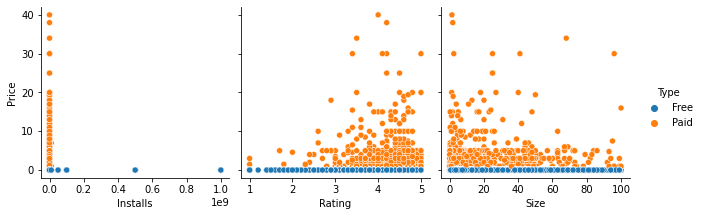

In [506]:
sns.pairplot(data=app_df, hue="Type",y_vars=['Price'], x_vars=['Installs','Rating','Size'],height=3)

##### Rating distribution

mean Rating is:  4.17


<Figure size 3600x4680 with 0 Axes>

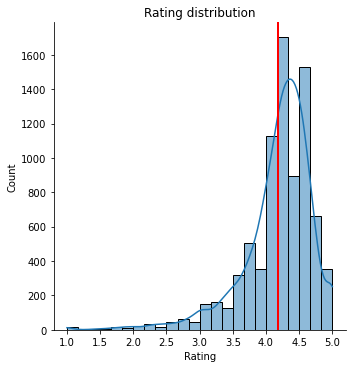

In [507]:
plt.figure(figsize=(50,65))
ara = sns.displot(data=app_df,  
                  bins=24,
                  x="Rating",
                  kde=True
                  )

plt.title("Rating distribution")
plt.axvline(x=app_df.Rating.mean(),
            color='red',
            lw=2)

print("mean Rating is: ", round(app_df.Rating.mean(),2))

In [508]:
stars = []
fraction = []
step =0.5
total_number_of_apps = len(app_df.Rating)
for i in np.arange(0, 5, step):
    number_of_apps = len(app_df.loc[(app_df.Rating>i)&(app_df.Rating<=i+step)])
    fraction.append(str(round(number_of_apps*100/total_number_of_apps,1))+"%")
    stars.append(str(i)+"-"+str(i+step))
ara =zip(stars,fraction)    
print(tabulate(ara, headers=["stars", "fraction"]))

stars    fraction
-------  ----------
0.0-0.5  0.0%
0.5-1.0  0.2%
1.0-1.5  0.1%
1.5-2.0  0.5%
2.0-2.5  1.0%
2.5-3.0  2.6%
3.0-3.5  6.2%
3.5-4.0  18.8%
4.0-4.5  49.7%
4.5-5.0  20.8%


**<font color='tomato'> Conclusion from Rating distribution:</font>**

   ```half of the apps get between 4 to 4.5 stars ```

In [509]:
categories = app_df.Category.value_counts().sort_values(ascending=False).head(7)
categories

family             1601
game                910
tools               715
productivity        301
personalization     298
lifestyle           296
finance             295
Name: Category, dtype: int64

In [510]:
top_apps_df = app_df.loc[app_df["Rating"]>=4.0]
top_categories = top_apps_df.Category.value_counts().sort_values(ascending=False).head(7)
top_categories

family             1205
game                762
tools               488
personalization     267
productivity        243
finance             222
medical             215
Name: Category, dtype: int64

In [511]:
bottom_apps_df = app_df.loc[app_df["Rating"]<4.0]
bottom_categories = bottom_apps_df.Category.value_counts().sort_values(ascending=False).head(7)
bottom_categories

family       396
tools        227
game         148
lifestyle     91
business      76
medical       74
finance       73
Name: Category, dtype: int64

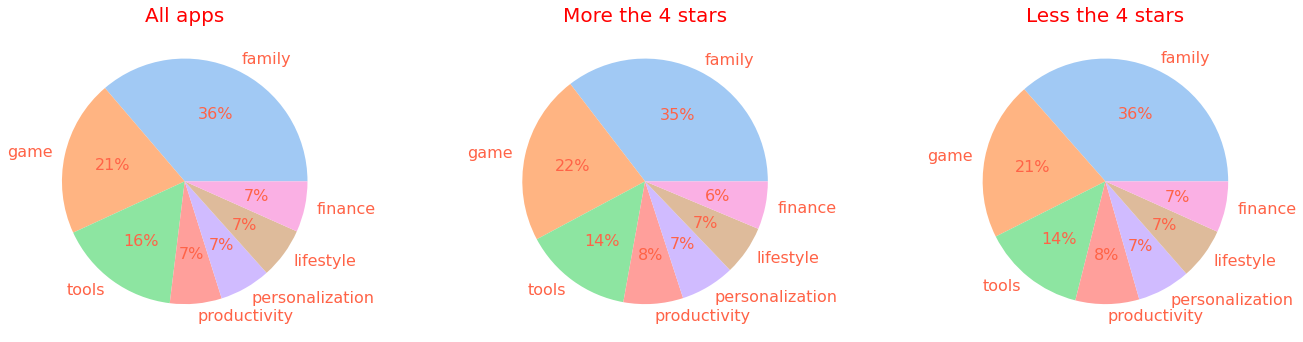

In [512]:
plt.figure(figsize=(22,12))
colors = sns.color_palette('pastel')[0:7]

plt.subplot(1,3,1)
plt.pie(categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("All apps",size=20,color="red")

plt.subplot(1,3,2)
plt.pie(top_categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("More the 4 stars",size=20,color="red")

plt.subplot(1,3,3)
plt.pie(bottom_categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("Less the 4 stars",size=20,color="red")

plt.subplots_adjust(wspace=0.5)
plt.show()

### <span style="color:red">correlations</span>

**<font color='tomato'> Conclusion from Rating distribution</font>**

   ```High ranked apps and low ranking apps has the same apps categories Distribution   ```

In [513]:
print("there are "+str(len(app_df.Category.unique()))+" diffrent apps categories")

there are 33 diffrent apps categories


In [514]:
Category_rate = app_df.groupby("Category").Rating.mean().round(2)
print(Category_rate.sort_values(ascending=False).head())
print(Category_rate.sort_values(ascending=False).tail())

Category
events                 4.44
art_and_design         4.36
education              4.36
books_and_reference    4.34
personalization        4.33
Name: Rating, dtype: float64
Category
travel_and_local       4.07
maps_and_navigation    4.04
tools                  4.04
video_players          4.04
dating                 3.97
Name: Rating, dtype: float64


dating apps getting the lowest ranking, event apps get the lead.

In [523]:
agg = app_df.groupby("Category")["Price","Rating","Installs","Reviews"].mean().round(2).head(5)
agg

C:\Users\PC\AppData\Local\Temp/ipykernel_22608/2259833111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg = app_df.groupby("Category")["Price","Rating","Installs","Reviews"].mean().round(2).head(5)


,Price,Rating,Installs,Reviews
Category,,,,
art_and_design,0.10,4.36,1872673.77,23264.51
auto_and_vehicles,0.03,4.19,727805.48,15940.14
beauty,0.00,4.28,640861.90,9407.93
books_and_reference,0.14,4.34,9856755.36,98940.27
business,0.25,4.10,2660370.69,37746.44


### <span style="color:red">correlations</span>

In [524]:
agg.corr()

,Price,Rating,Installs,Reviews
Price,1.000000,-0.415186,0.405968,0.478116
Rating,-0.415186,1.000000,0.363746,0.279400
Installs,0.405968,0.363746,1.000000,0.995044
Reviews,0.478116,0.279400,0.995044,1.000000


<AxesSubplot:>

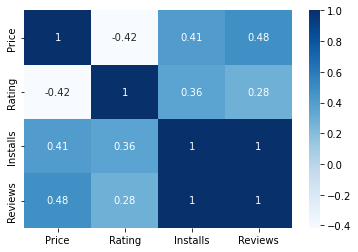

In [525]:
sns.heatmap(agg.corr(),cmap="Blues", annot=True)

**<font color='tomato'> Conclusion from correlations</font>**

1. Rating insn't in correlation with the outher numeric columns
1. Apps with big number of installs have big number of reviews, but it ain't means that they are good reviews

### <span style="color:red">conclusion</span>

### <span style="color:red">Bonus: Python vs SQL</span>

In [ ]:
#@usd_decorator 
# app_df.to_clipboard(sep=",")